In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv(r"c:\Users\Admin\Documents\DataSets\Admission_Predict.csv")

In [11]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


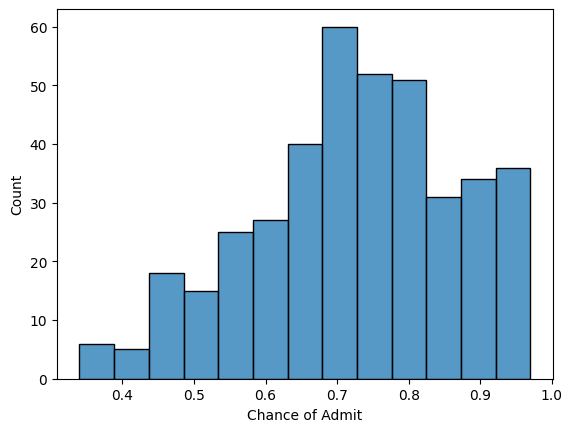

In [13]:
sns.histplot(df['Chance of Admit'])
plt.show()

In [15]:
df['Chance of Admit'].sample(5)

374    0.39
44     0.91
311    0.84
386    0.46
118    0.47
Name: Chance of Admit, dtype: float64

In [18]:
df['Admitted'] = df['Chance of Admit'] >=0.75

In [24]:
df['Admitted']

0       True
1       True
2      False
3       True
4      False
       ...  
395     True
396     True
397     True
398    False
399     True
Name: Admitted, Length: 400, dtype: bool

In [20]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Admitted             0
dtype: int64

In [21]:
df.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [37]:
X = df.drop(columns=['Chance of Admit','Admitted'],axis=1)
Y=df['Admitted']

In [36]:
X

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [38]:
Y


0       True
1       True
2      False
3       True
4      False
       ...  
395     True
396     True
397     True
398    False
399     True
Name: Admitted, Length: 400, dtype: bool

In [39]:
X_train , X_test , Y_train ,Y_test = train_test_split(X ,Y ,test_size=0.2 , random_state=42)

In [42]:
X_train.shape

(320, 8)

In [43]:
X_test.shape

(80, 8)

In [44]:
model = DecisionTreeClassifier()

In [45]:
model.fit(X_train ,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
y_pred = model.predict(X_test)

In [48]:
y_pred

array([False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False,  True,
        True,  True, False,  True, False, False,  True,  True])

In [49]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [50]:
Accuracy = accuracy_score(Y_test,y_pred)

In [52]:
Accuracy*100

88.75

In [53]:
precision_score(Y_test ,y_pred)

0.8157894736842105

In [54]:
from sklearn.tree import plot_tree

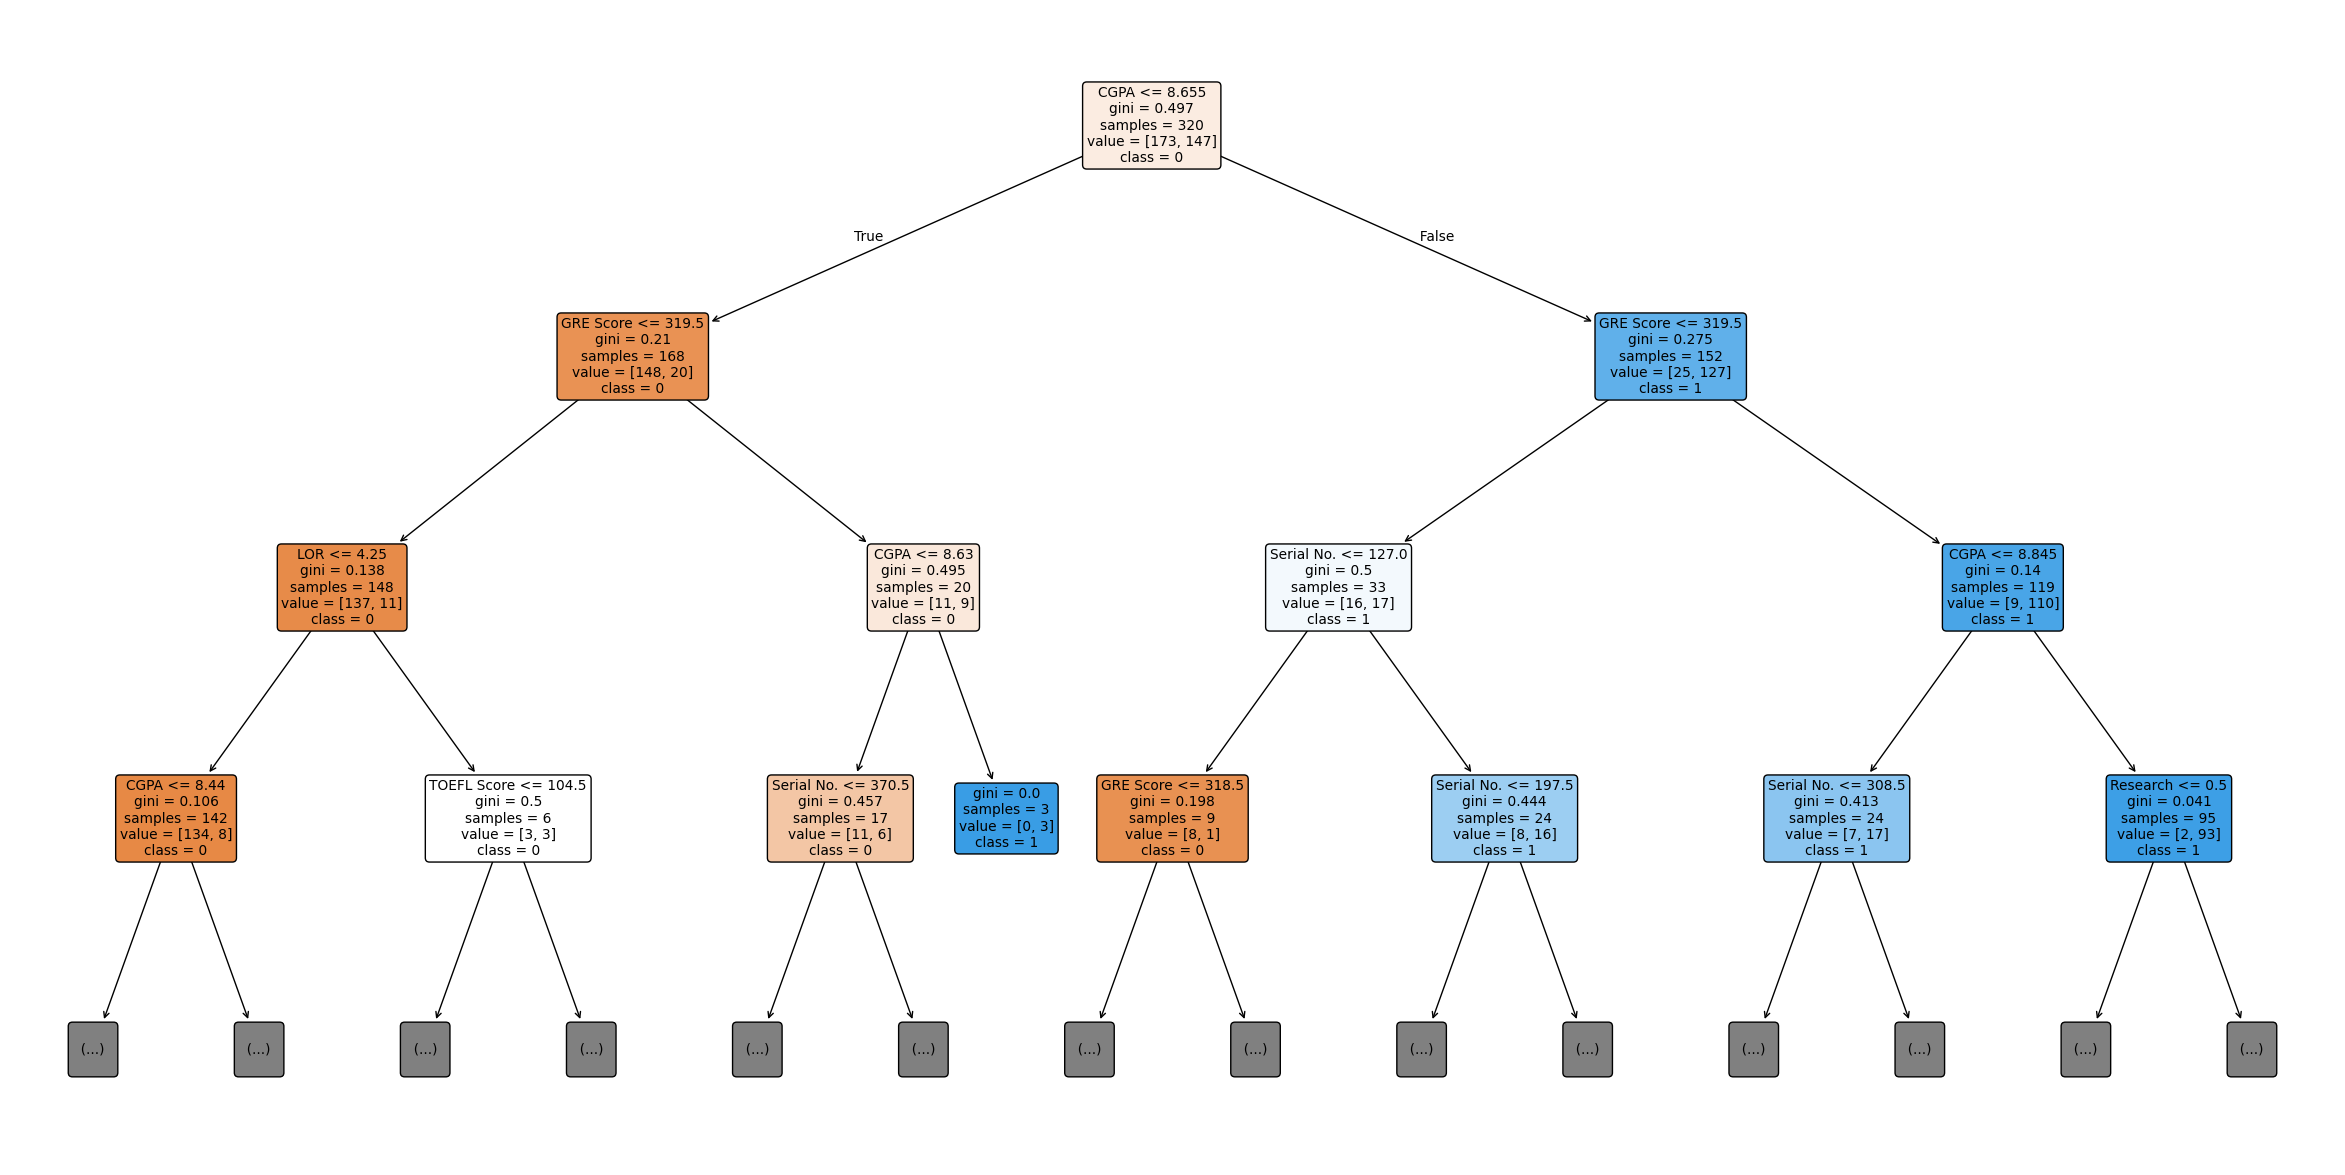

In [62]:
feature_names = X_train.columns
class_names = ['0','1']
plt.figure(figsize=(30, 15))  
plot_tree(model , feature_names=feature_names,class_names=class_names ,max_depth=3, filled=True , rounded=True) 
plt.show()